# TODO:
1. Представити початковi данi графiчно.

2. Розбити данi на навчальний та валiдацiйний набори.

3. Побудувати на навчальному наборi даних моделi регресiї.

4. Представити моделi графiчно (наприклад вивести частину дерева рiшень, побудувати лiнiю регресiї тощо).

5. Виконати прогнози на основi побудованих моделей.

6. Для кожної з моделей оцiнити, чи має мiсце перенавчання.

10. В задачах регресiї розрахувати для кожної моделi наступнi критерiї якостi, окремо на навчальнiй та валiдацiйнiй множинах:

• коефiцiєнт детермiнацiї R2,
• помилки RMSE, MAE та MAPE.

11. Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

12. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.

13. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

14. Кожний варiант мiстить два набори даних. Дослiдити обидва набори за наведеними вище етапами. Можна обрати власний набiр даних (повiдомивши попередньо про це викладача), наприклад, з цiкавої вам практичної задачi. Для кожного набору спробувати пiдiбрати найкращу модель.

TODO-spec:
3. Побудувати модель регресiї, використовуючи sklearn.neural_network.MLPRegressor

Початковi данi:
(а) sklearn.datasets.load_diabetes
(б) www.kaggle.com/htagholdings/property-sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from executing.executing import node_linenos
from pandas import DataFrame
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE, mean_absolute_error as MAE, mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from math import ceil

In [2]:
def metrics_calc(y_true: np.array, y_predict: np.array):
    """Функція для зручного обчислення метрик регресії"""
    metrics = {
        "r2": R2(y_true, y_predict),
        "rmse": np.sqrt(MSE(y_true, y_predict)),
        "mae": MAE(y_true, y_predict),
        "mape": MAPE(y_true, y_predict)}
    return metrics

In [3]:
ds_1 = load_diabetes(as_frame = True).frame
ds_2 = pd.read_csv('./raw_sales.csv')

In [4]:
ds_1 # Огляд першого датасету

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
ds_2 # Огляд другого датасету

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [6]:
ds_2.drop(columns = ["postcode"], inplace =True) # Поштовий індекс не є вагомим, тому видаляємо його як зайву інформацію

# Переводимо дату в формат datetime і розбиваємо на місяці дні тижня
ds_2["datesold"] = pd.to_datetime(ds_2["datesold"])
ds_2['day'] = ds_2["datesold"].dt.day
ds_2["month"] = ds_2["datesold"].dt.month
ds_2['year'] = ds_2['datesold'].dt.year

# Змінюємо значення propertyType на True(unit)/False(house)
ds_2["propertyType"] = pd.get_dummies(ds_2["propertyType"], drop_first = True)

# Видаляємо початковий стовбець з часом продажу
ds_2.drop(columns = ["datesold"], inplace = True)

In [7]:
ds_2 # Тепер можна подивитись на оновлений датасет

,price,propertyType,bedrooms,day,month,year
0,525000,False,4,7,2,2007
1,290000,False,3,27,2,2007
2,328000,False,3,7,3,2007
3,380000,False,4,9,3,2007
4,310000,False,3,21,3,2007
...,...,...,...,...,...,...
29575,500000,True,3,25,7,2019
29576,560000,True,2,25,7,2019
29577,464950,True,2,26,7,2019
29578,589000,True,2,26,7,2019


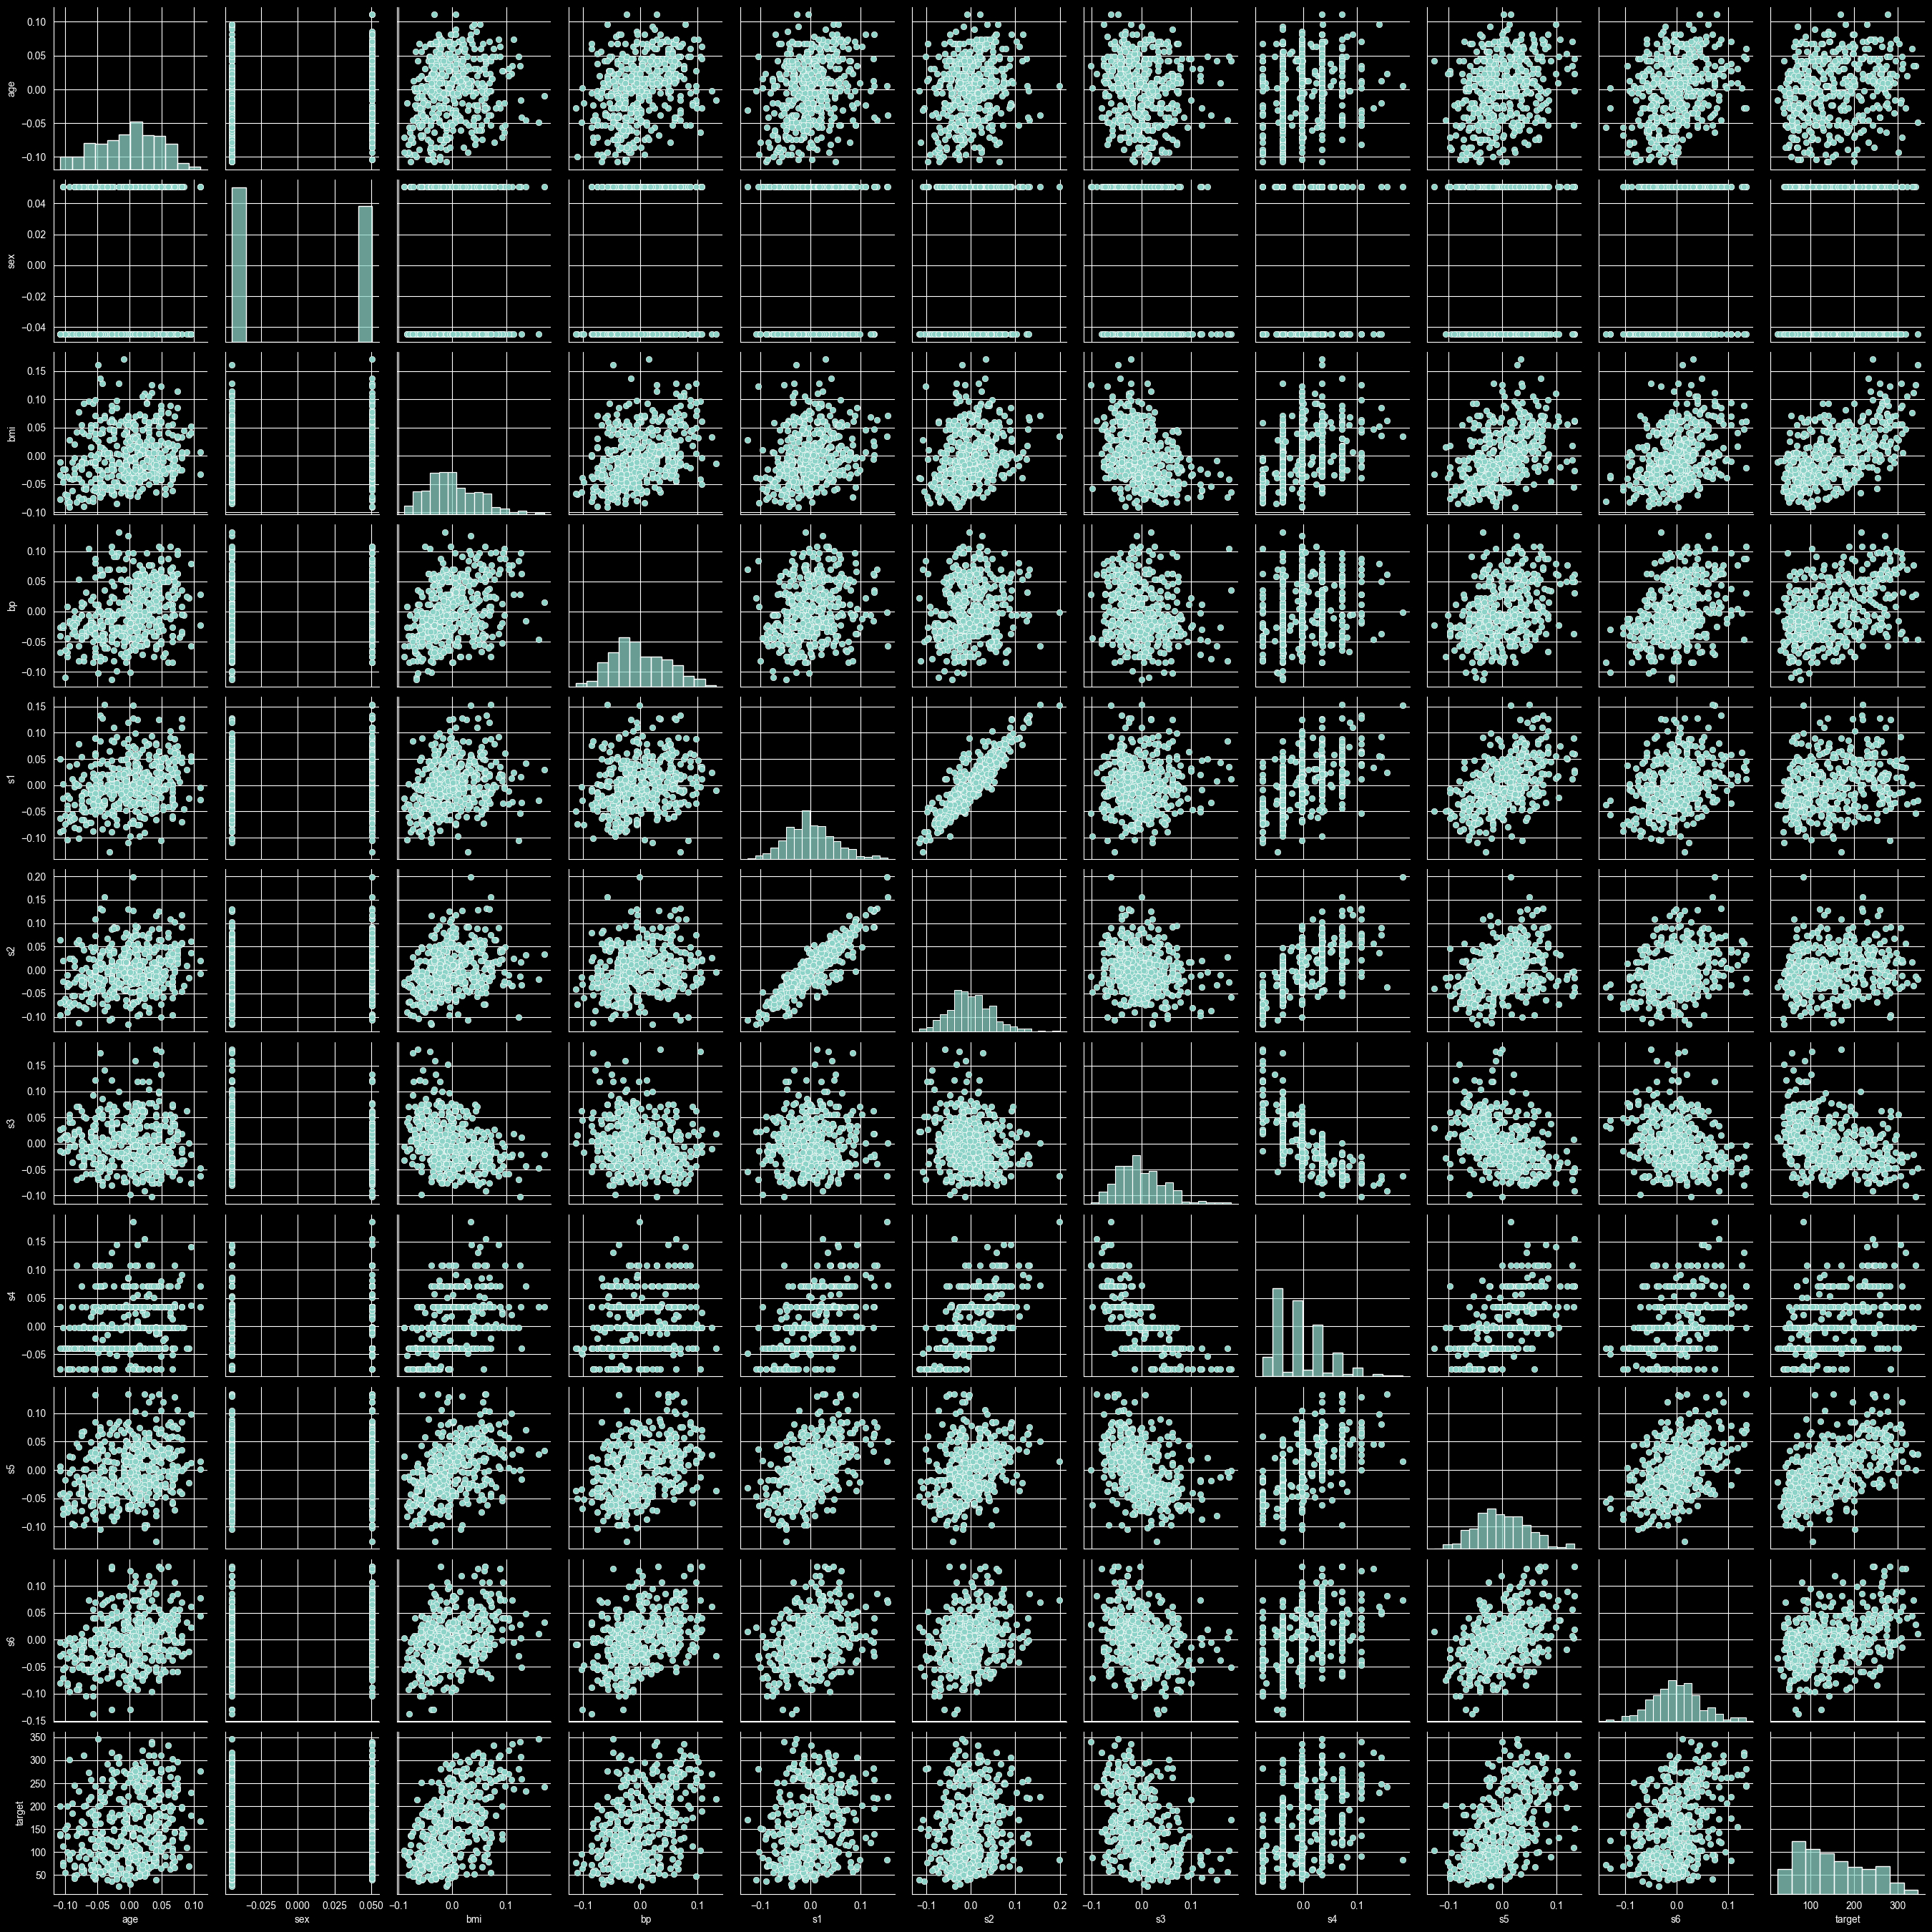

In [8]:
sns.pairplot(ds_1); # Поглянемо на розподіл ознак відносно один одної у першому датасеті

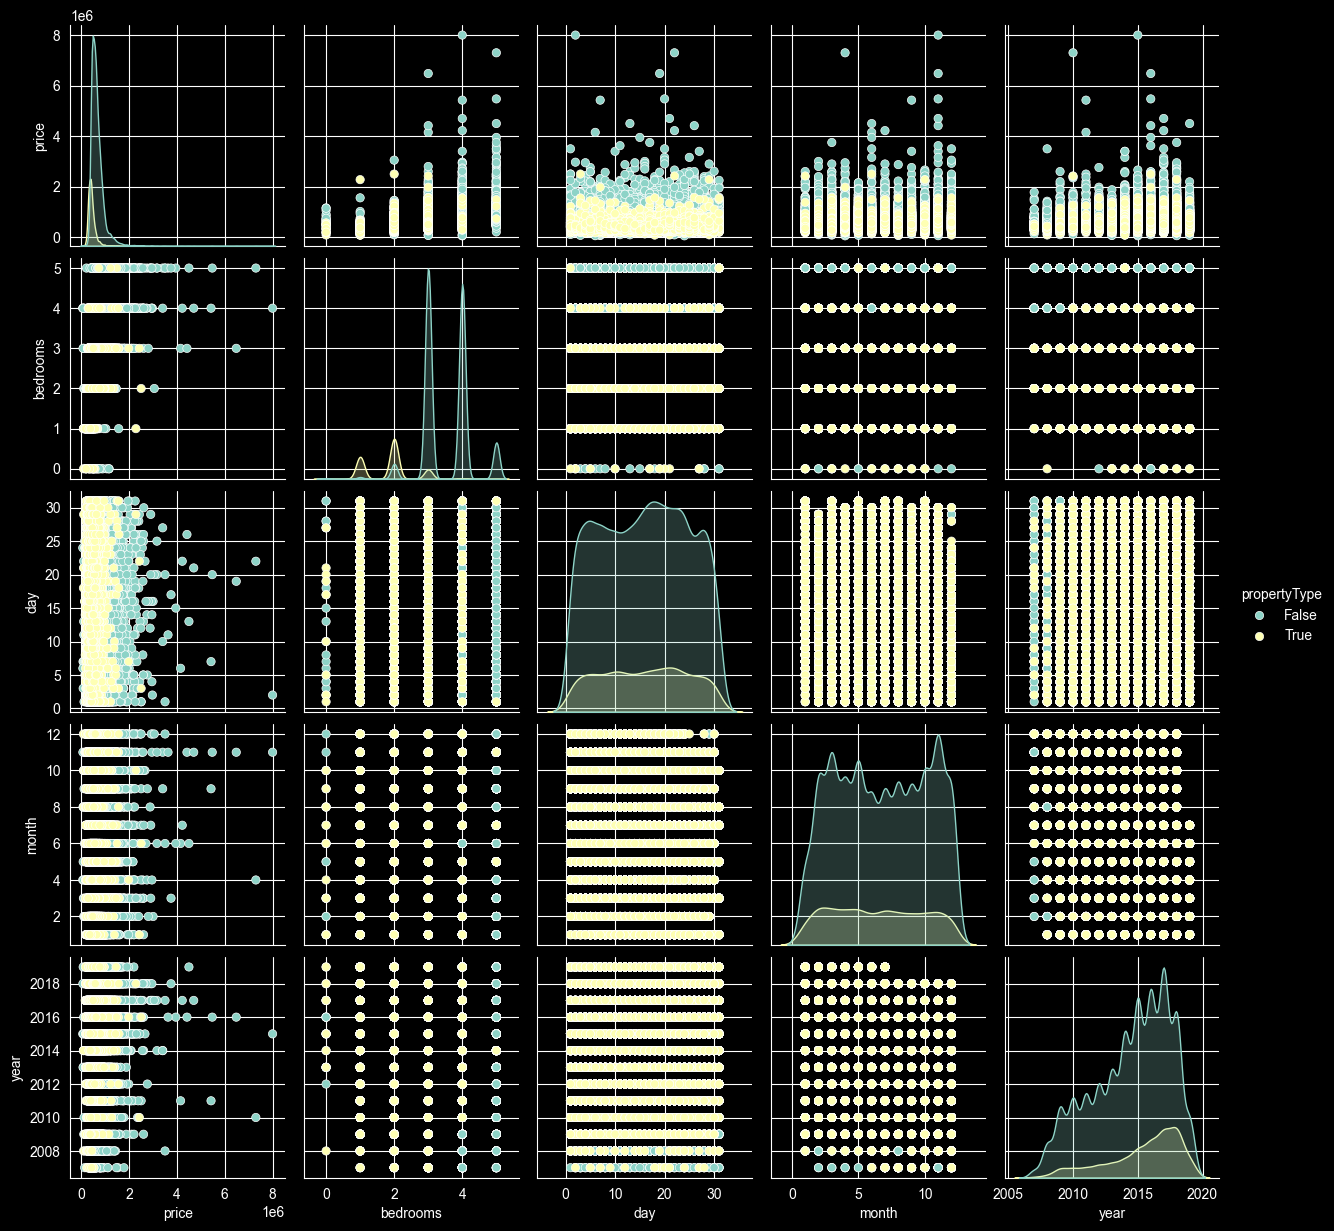

In [9]:
sns.pairplot(ds_2, hue = 'propertyType'); # Поглянемо на розподіл ознак відносно один одної у другому датасеті

In [15]:
# Створюємо порожній DataFrame для зберігання майбутніх результатів
results = pd.DataFrame(columns = ['architecture', 'train_size',"ds", 'r2', 'rmse', 'mae', 'mape', 'test_super_metric', 'train_super_metric'])

for train_size in np.linspace(0.2, 0.8, 5):  # Робимо цикл по розміру навчального набору

    # Розбиваємо індекси ds_1 та ds_2 у пропорції поточної ітерації циклу
    train_ds_1, test_ds_1 = train_test_split(np.arange(0, len(ds_1)), test_size=1 - train_size, random_state=42)
    train_ds_2, test_ds_2 = train_test_split(np.arange(0, len(ds_2)), test_size=1 - train_size, random_state=42)

    # За розбитими індексами розбиваємо самі набори даних. Для зручності зберігаємо їх у словнику
    dss = {
        "ds_1":{"X_train": ds_1.loc[train_ds_1].drop(columns =["target"]), "y_train": ds_1.loc[train_ds_1, ["target"]],
                "X_test": ds_1.loc[test_ds_1].drop(columns =["target"]), "y_test": ds_1.loc[test_ds_1, ["target"]], },
        "ds_2": {"X_train":ds_2.loc[train_ds_2].drop(columns =["price"]), "y_train": ds_2.loc[train_ds_2, ["price"]],
                 "X_test": ds_2.loc[test_ds_2].drop(columns =["price"]), "y_test": ds_2.loc[test_ds_2, ["price"]]}
    }

    for ds in dss: # Цикл для ітерації по обох датасетах

        for arch in [1, 5, 10, 20, 50, 100, 200, 300, 400, 500]:
            model = MLPRegressor(hidden_layer_sizes=arch,
                     activation='relu',
                     solver='adam',
                     learning_rate_init=1e-3,
                     max_iter=2000,
                     early_stopping=True,
                     n_iter_no_change=20,
                     tol=1e-4,
                     random_state=42,
                     verbose=False)


            ds_X_train = dss[ds]["X_train"]
            ds_y_train = dss[ds]["y_train"]
            ds_X_test = dss[ds]["X_test"]
            ds_y_test = dss[ds]["y_test"]

            ds_y_train = np.ravel(ds_y_train)
            ds_y_test = np.ravel(ds_y_test)

            scaler = StandardScaler()
            ds_X_train = scaler.fit_transform(ds_X_train)
            ds_X_test = scaler.transform(ds_X_test)

            # Навчаємо модель на навчальних даних
            model.fit(ds_X_train, ds_y_train)

            # Перевіряємо модель на навчальній множині та зберігаємо результат
            y_pred = model.predict(ds_X_train)
            new_row = pd.DataFrame.from_dict(metrics_calc(ds_y_train, y_pred), orient = "index").T
            # Додаємо нову метрику, за якою оцінюватимемо якість моделі, як лінійну комбінацію чотирьох базових
            train_super_metric = (new_row['r2']  * -100 + new_row['mape'] * 100) + new_row['rmse'] + new_row['mae']
            #print("train", metrics_calc(ds_y_train, y_pred))

            # Перевіряємо модель на тестувальній множині та зберігаємо результат
            y_pred = model.predict(ds_X_test)
            new_row = pd.DataFrame.from_dict(metrics_calc(ds_y_test, y_pred), orient = "index").T
            new_row['train_super_metric'] = train_super_metric
            new_row['test_super_metric'] = (new_row['r2']  * -100 + new_row['mape'] * 100) + new_row['rmse'] + new_row['mae']
            new_row["ds"] = ds
            new_row['train_size'] = train_size
            new_row['architecture'] = arch
            results = pd.concat([results, new_row], ignore_index=True)
            #print("val", metrics_calc(ds_y_test, y_pred))

In [16]:
idx = results.groupby(['ds']) # Вибираємо значення для тестових даних і групуємо
results

,architecture,train_size,ds,r2,rmse,mae,mape,test_super_metric,train_super_metric
0,1,0.2,ds_1,-1.920493,132.019763,116.952305,0.774203,518.441625,507.476094
1,5,0.2,ds_1,-3.472583,163.376677,137.458259,0.808046,728.897851,616.029832
2,10,0.2,ds_1,-0.120009,81.756370,64.099008,0.435607,201.416937,163.002451
3,20,0.2,ds_1,0.172991,70.253175,55.293631,0.420538,150.301531,96.367042
4,50,0.2,ds_1,-0.504031,94.741269,74.162993,0.469453,266.252618,235.137772
...,...,...,...,...,...,...,...,...,...
95,100,0.8,ds_2,0.290228,218998.775863,145295.650323,0.240532,364289.456594,394567.276296
96,200,0.8,ds_2,0.296501,218028.924961,144576.242795,0.238738,362599.391507,393215.394592
97,300,0.8,ds_2,0.295836,218131.927975,144686.650897,0.239007,362812.895939,393345.094762
98,400,0.8,ds_2,0.296938,217961.134933,144527.398131,0.238661,362482.705377,393249.031075


In [17]:
best_of_the_best = idx['test_super_metric'].min(numeric_only=True)
best_of_the_best

ds
ds_1        87.810031
ds_2    361228.738247
Name: test_super_metric, dtype: float64

In [18]:
new_results = results[(results['test_super_metric'] == best_of_the_best['ds_1']) | (results['test_super_metric'] == best_of_the_best['ds_2'])]
new_results

,architecture,train_size,ds,r2,rmse,mae,mape,test_super_metric,train_super_metric
88,400,0.8,ds_1,0.462021,53.388130,43.368207,0.372558,87.810031,69.625680
99,500,0.8,ds_2,0.300194,217455.948378,143779.134554,0.236747,361228.738247,391855.632329
